In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import torch 
from Curriculum import Curriculum

In [20]:
curriculum = Curriculum(max_iter=10000)

In [21]:
curriculum.add_param_list(
    [
    ("a0", curriculum.constant_scheduler(2.0)),
    ("a1", curriculum.linear_scheduler(0.5, 0.1)),
    ("a2", curriculum.exponential_scheduler(0.1, 0.5)),
    ("a3", curriculum.constant_than_linear_scheduler(0.1, 0.5, 0.5))
    ]
)

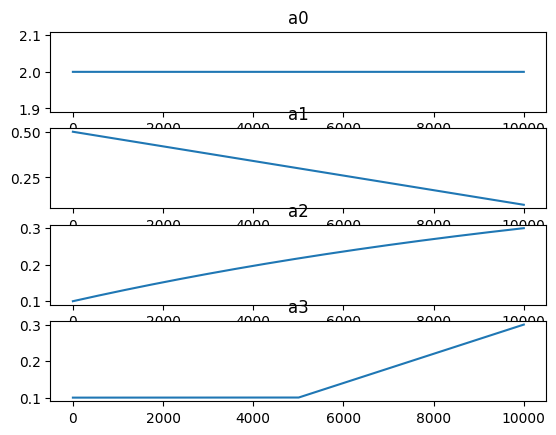

In [22]:
curriculum.plot_all_schedules()